In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import json 
import re 

import nltk 
from nltk.tokenize import word_tokenize


from wordcloud import WordCloud,STOPWORDS

import math





In [2]:
df = pd.read_csv("data.csv")


In [ ]:
#data_job = json.loads('ads.json')
#df_jobad = pd.read_json('ads.json')
with open('ads.json') as data_file:
        data = data_file.read()


In [3]:
df_json = pd.read_json('ads.json', lines=True)


In [4]:
df_json.info()
df_json.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   title     50000 non-null  object
 2   abstract  50000 non-null  object
 3   content   50000 non-null  object
 4   metadata  50000 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.9+ MB


,id,title,abstract,content,metadata
0,38915469,Recruitment Consultant,We are looking for someone to focus purely on ...,<HTML><p>Are you looking to join a thriving bu...,{'standout': {'bullet1': 'Join a Sector that i...
1,38934839,Computers Salesperson - Coburg,Passionate about exceptional customer service?...,<HTML><p>&middot;&nbsp;&nbsp;Casual hours as r...,{'additionalSalaryText': 'Attractive Commissio...
2,38946054,Senior Developer | SA,Readifarians are known for discovering the lat...,<HTML><p>Readify helps organizations innovate ...,"{'standout': {'bullet1': 'Design, develop, tes..."
3,38833950,Senior Commercial Property Manager | Leading T...,~ Rare opportunity for a Senior PM to step int...,<HTML><p><strong>WayPoint Recruitment&nbsp;</s...,{'additionalSalaryText': '$140k + Car Park - C...
4,38856271,Technology Manager | Travel Industry,Rare opportunity for an experienced Technology...,<HTML>This is a key role within a market leadi...,{'standout': {'bullet1': 'Lead overarching str...


In [5]:
df_json.index

RangeIndex(start=0, stop=50000, step=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4304688 entries, 0 to 4304687
Data columns (total 5 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   event_datetime  object
 1   resume_id       int64 
 2   job_id          int64 
 3   event_platform  object
 4   kind            object
dtypes: int64(2), object(3)
memory usage: 164.2+ MB


In [7]:
df.head()

,event_datetime,resume_id,job_id,event_platform,kind
0,2021-05-01T08:42:05,158655,38820886,IOS_APP,V
1,2021-05-01T08:42:05,158655,38901970,IOS_APP,V
2,2021-05-01T08:42:05,158655,38919645,IOS_APP,V
3,2021-05-01T08:42:05,158655,38928402,IOS_APP,V
4,2021-05-01T08:42:05,158655,38847632,IOS_APP,V


In [33]:
#df['event_datetime'] = pd.to_datetime(df['event_datetime'])

In [34]:
#df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4304688 entries, 0 to 4304687
Data columns (total 5 columns):
 #   Column          Dtype         
---  ------          -----         
 0   event_datetime  datetime64[ns]
 1   resume_id       int64         
 2   job_id          int64         
 3   event_platform  object        
 4   kind            object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 164.2+ MB


In [35]:
#df.head()

,event_datetime,resume_id,job_id,event_platform,kind
0,2021-05-01 08:42:05,158655,38820886,IOS_APP,V
1,2021-05-01 08:42:05,158655,38901970,IOS_APP,V
2,2021-05-01 08:42:05,158655,38919645,IOS_APP,V
3,2021-05-01 08:42:05,158655,38928402,IOS_APP,V
4,2021-05-01 08:42:05,158655,38847632,IOS_APP,V


In [36]:
#df['Time'] = df['event_datetime'].dt.time
#df['Date'] = df['event_datetime'].dt.date

# Identifying Duplicated Values

In [8]:
df['job_id'].value_counts()

38843647    1167
38862323    1167
38842752    1167
38879327    1167
38837807    1167
            ... 
38972551       3
38984963       3
38928700       3
38987513       3
38953619       3
Name: job_id, Length: 50000, dtype: int64

# Exploring missing Values

In [9]:
df.isnull().sum()

event_datetime    0
resume_id         0
job_id            0
event_platform    0
kind              0
dtype: int64

# Exploring coloumns

In [10]:
df.columns

Index(['event_datetime', 'resume_id', 'job_id', 'event_platform', 'kind'], dtype='object')

In [40]:
df['event_platform'].value_counts()

WEB            1520004
IOS_APP        1423281
ANDROID_APP    1361403
Name: event_platform, dtype: int64

In [41]:
df['kind'].value_counts()

V    3943203
A     361485
Name: kind, dtype: int64

In [42]:
df['Time'].value_counts()

02:25:28    942
02:29:33    879
01:29:19    867
21:24:03    855
03:28:36    840
           ... 
15:17:38      3
20:33:21      3
01:57:15      3
05:24:40      3
22:34:25      3
Name: Time, Length: 55478, dtype: int64

In [11]:
df['Date'].value_counts()

2021-05-01    4304688
Name: Date, dtype: int64

# Given a job id how many Views(V) and how many Apply(A)?

In [11]:
ndf = df.groupby(["job_id","kind"]).count()['resume_id'].reset_index().pivot(index='job_id', columns = 'kind')

In [12]:
ndf = ndf.fillna(0)

In [13]:
ndf['resume_id', 'A']

job_id
34651092     3.0
35777980     6.0
36159727    15.0
36732624     0.0
36883097     9.0
            ... 
39084900     0.0
39084994     6.0
39085046    15.0
39085061     6.0
39085071    78.0
Name: (resume_id, A), Length: 50000, dtype: float64

In [14]:
ndf.isnull().sum()

           kind
resume_id  A       0
           V       0
dtype: int64

<AxesSubplot:xlabel='job_id'>

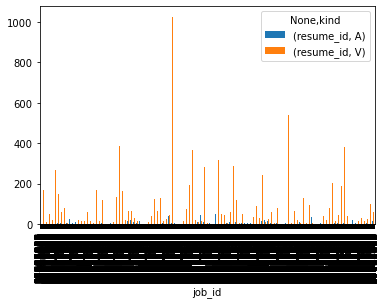

In [46]:
ndf.plot.bar()

# Data Analysis and Cleaning for json file


In [33]:
print('Data Shape', df_json.shape)# Notice we have 5000 jobs with id in our CSV matches with this number of rows 

Data Shape (50000, 5)


In [15]:
df_json.columns

Index(['id', 'title', 'abstract', 'content', 'metadata'], dtype='object')

In [4]:
def convert_utf8(s):
    return str(s)

df_json['content'] = df_json['content'].map(convert_utf8)
df_json['metadata'] = df_json['metadata'].map(convert_utf8)

In [16]:
df_json.loc[78, 'metadata']

{'classification': {'name': 'Manufacturing, Transport & Logistics'},
 'subClassification': {'name': 'Warehousing, Storage & Distribution'},
 'area': {'name': 'Southern Suburbs & Logan'},
 'location': {'name': 'Brisbane'},
 'suburb': {'name': 'Milton'},
 'workType': {'name': 'Casual/Vacation'}}

## Cleaning up the content 

In [5]:
# Remove the urls
def remove_urls(s):
    s = re.sub('[^\s]*.com[^\s]*', "", s)
    s = re.sub('[^\s]*www.[^\s]*', "", s)
    s = re.sub('[^\s]*.co.uk[^\s]*', "", s)
    return s


df_json['clean_content'] = df_json['content'].map(remove_urls)


In [80]:
#df_json.loc[78, 'clean_content'] # Notice url has been removed 

In [6]:
# Remove the star_words
def remove_star_words(s):
    return re.sub('[^\s]*[\*]+[^\s]*', "", s)

df_json['clean_content'] = df_json['clean_content'].map(remove_star_words)


In [67]:
#df_json.loc[78, 'clean_content'] # Notice url has been removed 

In [7]:
# Remove the html_words
def remove_html(s):
    #s = re.sub('[^\s]*<[^\s]*', "", s)
    #s = re.sub('[^\s]*>[^\s]*', "", s)
    #s = re.sub('[^\S]*<[^\S]*', "", s)
    #s = re.sub('[^\S]*>[^\S]*', "", s)
    s= re.sub('<[^>]+>', '', s).strip()
    return s

df_json['clean_content'] = df_json['clean_content'].map(remove_html)


In [79]:
#df_json.loc[78, 'clean_content'] # Notice url has been removed 

In [8]:
# Remove the punctuations
from string import punctuation

def remove_punctuation(s):
    global punctuation
    for p in punctuation:
        s = s.replace(p, '')
    return s

df_json['clean_content'] = df_json['clean_content'].map(remove_punctuation)



In [ ]:
df_json.loc[78, 'clean_content'] # Notice url has been removed 

## What are the top 5 part of speech in the job content? What is the frequency?

In [21]:
corpus = " ".join(df_json['clean_content'].tolist()) # collection of all word in content of the ads

# This is the NLTK function to break a strings in tokens, that is for each word it assign a it to be Noun(NN), Verb(V)
tokens = word_tokenize(corpus)

answer = nltk.pos_tag(tokens)
answer_pos = [a[1] for a in answer]

all_pos = pd.Series(answer_pos)
all_pos.value_counts().head()






NN     2809750
NNP    1803124
IN     1561949
JJ     1340997
DT     1105515
dtype: int64

## Excluding stopwords let see how does the frequency changes 

In [23]:
# store english stopwords in a list
from nltk.corpus import stopwords
en_stopwords = stopwords.words('english')

def remove_stopwords(s):
    global en_stopwords
    s = word_tokenize(s)
    s = " ".join([w for w in s if w not in en_stopwords])
    return s

df_json['clean_content_no_stop'] = df_json['clean_content'].map(remove_stopwords)

# The remaing is same as the before 

corpus = " ".join(df_json['clean_content_no_stop'].tolist()) # collection of all word in content of the ads

# This is the NLTK function to break a strings in tokens, that is for each word it assign a it to be Noun(NN), Verb(V)
tokens = word_tokenize(corpus)

answer = nltk.pos_tag(tokens)
answer_pos = [a[1] for a in answer]

all_pos = pd.Series(answer_pos)
all_pos.value_counts().head()


NN     2765902
NNP    1867686
JJ     1334254
NNS    1014905
VBG     554951
dtype: int64

In [24]:
corpus = " ".join(df_json['clean_content'].tolist())
#tokenize words
tokenized_corpus = nltk.word_tokenize(corpus)
fd = nltk.FreqDist(tokenized_corpus)

# get the top words
top_words = []
for key, value in fd.items():
    top_words.append((key, value))

# sort the list by the top frequencies
top_words = sorted(top_words, key = lambda x:x[1], reverse = True)

# keep top 100 words only
top_words = top_words[:100]

# Keep the frequencies only from the top word series
top_word_series = pd.Series([w for (v,w) in top_words])
top_word_series[:5]

# get actual ranks of these words - wherever we see same frequencies, we give same rank
word_ranks = top_word_series.rank(method = 'min', ascending = False)

The value of theta obtained is: [-1.02798373]


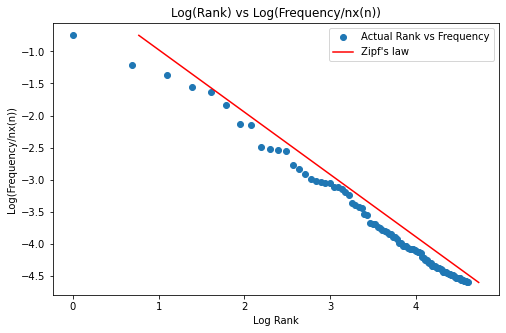

In [27]:
# Get the value of the denominator n*x_n
denominator = max(word_ranks)*min(top_word_series)

# Y variable is the log of word ranks and X is the word frequency divided by the denominator
# above
Y = np.array(np.log(word_ranks))
X = np.array(np.log(top_word_series/denominator))

# fit a linear regression to these, we dont need the intercept!
from sklearn import linear_model
reg_model = linear_model.LinearRegression(fit_intercept = False)
reg_model.fit(Y.reshape(-1,1), X)
print("The value of theta obtained is:",reg_model.coef_)

# make a plot of actual rank obtained vs theoretical rank expected
plt.figure(figsize = (8,5))
plt.scatter(Y, X, label = "Actual Rank vs Frequency")
plt.title('Log(Rank) vs Log(Frequency/nx(n))')
plt.xlabel('Log Rank')
plt.ylabel('Log(Frequency/nx(n))')

plt.plot(reg_model.predict(X.reshape(-1,1)), X, color = 'red', label = "Zipf's law")
plt.legend()

In [25]:
df_json.columns

Index(['id', 'title', 'abstract', 'content', 'metadata', 'clean_content',
       'clean_content_no_stop'],
      dtype='object')

In [28]:
ndf.columns

MultiIndex([('resume_id', 'A'),
            ('resume_id', 'V')],
           names=[None, 'kind'])

In [29]:
ndf.head()

resume_id       
kind             A      V
job_id                   
34651092       3.0  288.0
35777980       6.0   87.0
36159727      15.0  213.0
36732624       0.0    6.0
36883097       9.0   45.0

In [115]:
ndf1 = df.groupby(["job_id","kind"]).count()['resume_id'].reset_index()

In [116]:
ndf1.head()

,job_id,kind,resume_id
0,34651092,A,3
1,34651092,V,288
2,35777980,A,6
3,35777980,V,87
4,36159727,A,15


In [122]:
df.columns

Index(['event_datetime', 'resume_id', 'job_id', 'event_platform', 'kind'], dtype='object')

In [9]:
ndfA = df.groupby(["job_id"])["kind"].apply(lambda x: x[x == 'A'].count()).reset_index().rename({'kind': 'Applied'}, axis=1)

In [10]:
ndfA.columns

Index(['job_id', 'Applied'], dtype='object')

In [11]:
ndfA.head()

,job_id,Applied
0,34651092,3
1,35777980,6
2,36159727,15
3,36732624,0
4,36883097,9


In [12]:
ndfV = df.groupby(["job_id"])["kind"].apply(lambda x: x[x == 'V'].count()).reset_index().rename({'kind': 'View'}, axis=1)

In [13]:
ndfV.head()

,job_id,View
0,34651092,288
1,35777980,87
2,36159727,213
3,36732624,6
4,36883097,45


In [147]:
df_json.columns

Index(['id', 'title', 'abstract', 'content', 'metadata', 'clean_content',
       'clean_content_no_stop'],
      dtype='object')

In [14]:
re_df_json= df_json.rename({'id' :'job_id'},axis = 1 )

In [15]:
re_df_json.columns

Index(['job_id', 'title', 'abstract', 'content', 'metadata', 'clean_content'], dtype='object')

In [35]:
re_df_json.head()

,job_id,title,abstract,content,metadata,clean_content,clean_content_no_stop
0,38915469,Recruitment Consultant,We are looking for someone to focus purely on ...,<HTML><p>Are you looking to join a thriving bu...,{'standout': {'bullet1': 'Join a Sector that i...,Are you looking to join a thriving business th...,Are looking join thriving business reward hard...
1,38934839,Computers Salesperson - Coburg,Passionate about exceptional customer service?...,<HTML><p>&middot;&nbsp;&nbsp;Casual hours as r...,{'additionalSalaryText': 'Attractive Commissio...,middotnbspnbspCasual hours as required transit...,middotnbspnbspCasual hours required transition...
2,38946054,Senior Developer | SA,Readifarians are known for discovering the lat...,<HTML><p>Readify helps organizations innovate ...,"{'standout': {'bullet1': 'Design, develop, tes...",Readify helps organizations innovate with tech...,Readify helps organizations innovate technolog...
3,38833950,Senior Commercial Property Manager | Leading T...,~ Rare opportunity for a Senior PM to step int...,<HTML><p><strong>WayPoint Recruitment&nbsp;</s...,{'additionalSalaryText': '$140k + Car Park - C...,WayPoint Recruitmentnbsphave partnered up with...,WayPoint Recruitmentnbsphave partnered withnbs...
4,38856271,Technology Manager | Travel Industry,Rare opportunity for an experienced Technology...,<HTML>This is a key role within a market leadi...,{'standout': {'bullet1': 'Lead overarching str...,This is a key role within a market leading wi...,This key role within market leading large shar...


In [16]:
m1 = pd.merge(re_df_json , ndfA , on = 'job_id')

In [17]:
m1.head()

,job_id,title,abstract,content,metadata,clean_content,Applied
0,38915469,Recruitment Consultant,We are looking for someone to focus purely on ...,<HTML><p>Are you looking to join a thriving bu...,{'standout': {'bullet1': 'Join a Sector that i...,Are you looking to join a thriving business th...,3
1,38934839,Computers Salesperson - Coburg,Passionate about exceptional customer service?...,<HTML><p>&middot;&nbsp;&nbsp;Casual hours as r...,{'additionalSalaryText': 'Attractive Commissio...,middotnbspnbspCasual hours as required transit...,12
2,38946054,Senior Developer | SA,Readifarians are known for discovering the lat...,<HTML><p>Readify helps organizations innovate ...,"{'standout': {'bullet1': 'Design, develop, tes...",Readify helps organizations innovate with tech...,0
3,38833950,Senior Commercial Property Manager | Leading T...,~ Rare opportunity for a Senior PM to step int...,<HTML><p><strong>WayPoint Recruitment&nbsp;</s...,{'additionalSalaryText': '$140k + Car Park - C...,WayPoint Recruitmentnbsphave partnered up with...,3
4,38856271,Technology Manager | Travel Industry,Rare opportunity for an experienced Technology...,<HTML>This is a key role within a market leadi...,{'standout': {'bullet1': 'Lead overarching str...,This is a key role within a market leading wi...,0


In [18]:
m1 = pd.merge(m1 , ndfV , on ='job_id')

In [19]:
m1.head()

,job_id,title,abstract,content,metadata,clean_content,Applied,View
0,38915469,Recruitment Consultant,We are looking for someone to focus purely on ...,<HTML><p>Are you looking to join a thriving bu...,{'standout': {'bullet1': 'Join a Sector that i...,Are you looking to join a thriving business th...,3,135
1,38934839,Computers Salesperson - Coburg,Passionate about exceptional customer service?...,<HTML><p>&middot;&nbsp;&nbsp;Casual hours as r...,{'additionalSalaryText': 'Attractive Commissio...,middotnbspnbspCasual hours as required transit...,12,117
2,38946054,Senior Developer | SA,Readifarians are known for discovering the lat...,<HTML><p>Readify helps organizations innovate ...,"{'standout': {'bullet1': 'Design, develop, tes...",Readify helps organizations innovate with tech...,0,21
3,38833950,Senior Commercial Property Manager | Leading T...,~ Rare opportunity for a Senior PM to step int...,<HTML><p><strong>WayPoint Recruitment&nbsp;</s...,{'additionalSalaryText': '$140k + Car Park - C...,WayPoint Recruitmentnbsphave partnered up with...,3,99
4,38856271,Technology Manager | Travel Industry,Rare opportunity for an experienced Technology...,<HTML>This is a key role within a market leadi...,{'standout': {'bullet1': 'Lead overarching str...,This is a key role within a market leading wi...,0,36


In [166]:
df_json.loc[8, 'metadata']

{'classification': {'name': 'Manufacturing, Transport & Logistics'},
 'subClassification': {'name': 'Team Leaders/Supervisors'},
 'location': {'name': 'Port Hedland, Karratha & Pilbara'},
 'suburb': {'name': 'Port Hedland'},
 'workType': {'name': 'Full Time'}}

## What are the most used word in job content

In [168]:
# import the necessary functions from the nltk library
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()

# prepare corpus from the descriptions that dont have stopwords
corpus = " ".join(df_json['clean_content_no_stop'].tolist())



#tokenize words
tokenized_corpus = nltk.word_tokenize(corpus)

# lemmatize these tokens
lemmatized_tokens = [lmtzr.lemmatize(token) for token in tokenized_corpus]

# word frequencies for the lemmatized tokens
fd = nltk.FreqDist(lemmatized_tokens)

# get the top words
top_words = []
for key, value in fd.items():
    top_words.append((key, value))

# sort the list by the top frequencies
top_words = sorted(top_words, key = lambda x:x[1], reverse = True)

# keep top 10 words only
top_words = top_words[:10]

top_words


[('team', 84556),
 ('work', 83572),
 ('experience', 80493),
 ('role', 79151),
 ('skill', 56743),
 ('nbsp', 56412),
 ('The', 52730),
 ('service', 52178),
 ('opportunity', 51927),
 ('We', 47042)]

In [181]:
Applied_perc_75 = np.percentile(m1['Applied'], 75)
m1['Applied'] = np.where(m1['Applied'] >= Applied_perc_75, 1, 0)

In [182]:
m1.dtypes.value_counts()

object    6
int64     3
dtype: int64

In [183]:
m1.head()

,job_id,title,abstract,content,metadata,clean_content,clean_content_no_stop,Applied,View
0,38915469,Recruitment Consultant,We are looking for someone to focus purely on ...,<HTML><p>Are you looking to join a thriving bu...,{'standout': {'bullet1': 'Join a Sector that i...,Are you looking to join a thriving business th...,Are looking join thriving business reward hard...,0,135
1,38934839,Computers Salesperson - Coburg,Passionate about exceptional customer service?...,<HTML><p>&middot;&nbsp;&nbsp;Casual hours as r...,{'additionalSalaryText': 'Attractive Commissio...,middotnbspnbspCasual hours as required transit...,middotnbspnbspCasual hours required transition...,1,117
2,38946054,Senior Developer | SA,Readifarians are known for discovering the lat...,<HTML><p>Readify helps organizations innovate ...,"{'standout': {'bullet1': 'Design, develop, tes...",Readify helps organizations innovate with tech...,Readify helps organizations innovate technolog...,0,21
3,38833950,Senior Commercial Property Manager | Leading T...,~ Rare opportunity for a Senior PM to step int...,<HTML><p><strong>WayPoint Recruitment&nbsp;</s...,{'additionalSalaryText': '$140k + Car Park - C...,WayPoint Recruitmentnbsphave partnered up with...,WayPoint Recruitmentnbsphave partnered withnbs...,0,99
4,38856271,Technology Manager | Travel Industry,Rare opportunity for an experienced Technology...,<HTML>This is a key role within a market leadi...,{'standout': {'bullet1': 'Lead overarching str...,This is a key role within a market leading wi...,This key role within market leading large shar...,0,36


In [188]:
from sklearn.model_selection import train_test_split
# Lets lemmatize the job descriptions before we run the model
def text_lemmatizer(s):
    '''Given a description, this lemmatizes it'''
    tokenized_corpus = nltk.word_tokenize(s)
    
    # lemmatize
    s = " ".join([lmtzr.lemmatize(token) for token in tokenized_corpus])
    return s

# lemmatize the descriptions
m1['clean_content_no_stop_lemm'] = m1['clean_content_no_stop'].map(text_lemmatizer)

# make the X and y matrices for model fitting
X = np.array(m1.loc[:, 'clean_content_no_stop_lemm'])
y = np.array(m1.loc[:, 'Applied'])

# split into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

# Convert the arrays into a presence/absence matrix
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)

from sklearn.naive_bayes import MultinomialNB
nb_mult_model = MultinomialNB().fit(X_train_counts, y_train)
predicted = nb_mult_model.predict(X_test_counts)

from sklearn import metrics

print("Model Accuracy:", metrics.accuracy_score(y_test, predicted))
print("Area under the ROC curve:", metrics.roc_auc_score(y_test, predicted))
print("Model Confusion Matrix:\n", metrics.confusion_matrix(y_test, predicted))

Model Accuracy: 0.7162
Area under the ROC curve: 0.5003828239532563
Model Confusion Matrix:
 [[7043  328]
 [2510  119]]


## Using Deep Learning to find a better fit

In [98]:
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

from tensorflow import keras

from keras.layers import Dense
from keras.models import Sequential


In [52]:
m1.head()

,job_id,title,abstract,content,metadata,clean_content,clean_content_no_stop,Applied,View
0,38915469,Recruitment Consultant,We are looking for someone to focus purely on ...,<HTML><p>Are you looking to join a thriving bu...,{'standout': {'bullet1': 'Join a Sector that i...,Are you looking to join a thriving business th...,Are looking join thriving business reward hard...,3,135
1,38934839,Computers Salesperson - Coburg,Passionate about exceptional customer service?...,<HTML><p>&middot;&nbsp;&nbsp;Casual hours as r...,{'additionalSalaryText': 'Attractive Commissio...,middotnbspnbspCasual hours as required transit...,middotnbspnbspCasual hours required transition...,12,117
2,38946054,Senior Developer | SA,Readifarians are known for discovering the lat...,<HTML><p>Readify helps organizations innovate ...,"{'standout': {'bullet1': 'Design, develop, tes...",Readify helps organizations innovate with tech...,Readify helps organizations innovate technolog...,0,21
3,38833950,Senior Commercial Property Manager | Leading T...,~ Rare opportunity for a Senior PM to step int...,<HTML><p><strong>WayPoint Recruitment&nbsp;</s...,{'additionalSalaryText': '$140k + Car Park - C...,WayPoint Recruitmentnbsphave partnered up with...,WayPoint Recruitmentnbsphave partnered withnbs...,3,99
4,38856271,Technology Manager | Travel Industry,Rare opportunity for an experienced Technology...,<HTML>This is a key role within a market leadi...,{'standout': {'bullet1': 'Lead overarching str...,This is a key role within a market leading wi...,This key role within market leading large shar...,0,36


In [ ]:
df_json["metadata"].str["area"].str["name"] 

In [53]:
Applied_perc_75 = np.percentile(m1['Applied'], 75)
m1['Applied'] = np.where(m1['Applied'] >= Applied_perc_75, 1, 0)

In [54]:
m1.head()

,job_id,title,abstract,content,metadata,clean_content,clean_content_no_stop,Applied,View
0,38915469,Recruitment Consultant,We are looking for someone to focus purely on ...,<HTML><p>Are you looking to join a thriving bu...,{'standout': {'bullet1': 'Join a Sector that i...,Are you looking to join a thriving business th...,Are looking join thriving business reward hard...,0,135
1,38934839,Computers Salesperson - Coburg,Passionate about exceptional customer service?...,<HTML><p>&middot;&nbsp;&nbsp;Casual hours as r...,{'additionalSalaryText': 'Attractive Commissio...,middotnbspnbspCasual hours as required transit...,middotnbspnbspCasual hours required transition...,1,117
2,38946054,Senior Developer | SA,Readifarians are known for discovering the lat...,<HTML><p>Readify helps organizations innovate ...,"{'standout': {'bullet1': 'Design, develop, tes...",Readify helps organizations innovate with tech...,Readify helps organizations innovate technolog...,0,21
3,38833950,Senior Commercial Property Manager | Leading T...,~ Rare opportunity for a Senior PM to step int...,<HTML><p><strong>WayPoint Recruitment&nbsp;</s...,{'additionalSalaryText': '$140k + Car Park - C...,WayPoint Recruitmentnbsphave partnered up with...,WayPoint Recruitmentnbsphave partnered withnbs...,0,99
4,38856271,Technology Manager | Travel Industry,Rare opportunity for an experienced Technology...,<HTML>This is a key role within a market leadi...,{'standout': {'bullet1': 'Lead overarching str...,This is a key role within a market leading wi...,This key role within market leading large shar...,0,36


In [60]:
m1['text'] = m1['title'] + ' ' + m1['clean_content_no_stop'] 

In [61]:
m1['text'][5]

'Cleaner Programmed Skilled Workforce currently seeking experienced residential cleaners work 54 45 roster Client highly regarded employer within mining sectorResponsibilities• Delivering quality cleaning service interacting client polite courteous manner working Company Policies Procedures Code Conduct• Working range cleaning equipment handling variety chemicals hazardous goods used cleaning procedures• Applying safe health conscious approach physically demanding environments including lifting bending twisting• Working autonomously well team environment always considering others around you• Presenting professional manner times reporting incidents concerns• Demonstrating excellent time management work ethic meet workflow requirements safely standardThe successful candidate possess following• Hold current drivers licence• Have cleaning experience• Be able pass preemployment medical DAS• Own Newman'

In [62]:
m1 = m1.replace(r'\n',' ', regex=True) 
m1 = m1.replace(r'\nb ',' ', regex=True) 


Index(['job_id', 'title', 'abstract', 'content', 'metadata', 'clean_content',
       'clean_content_no_stop', 'Applied', 'View', 'text'],
      dtype='object')

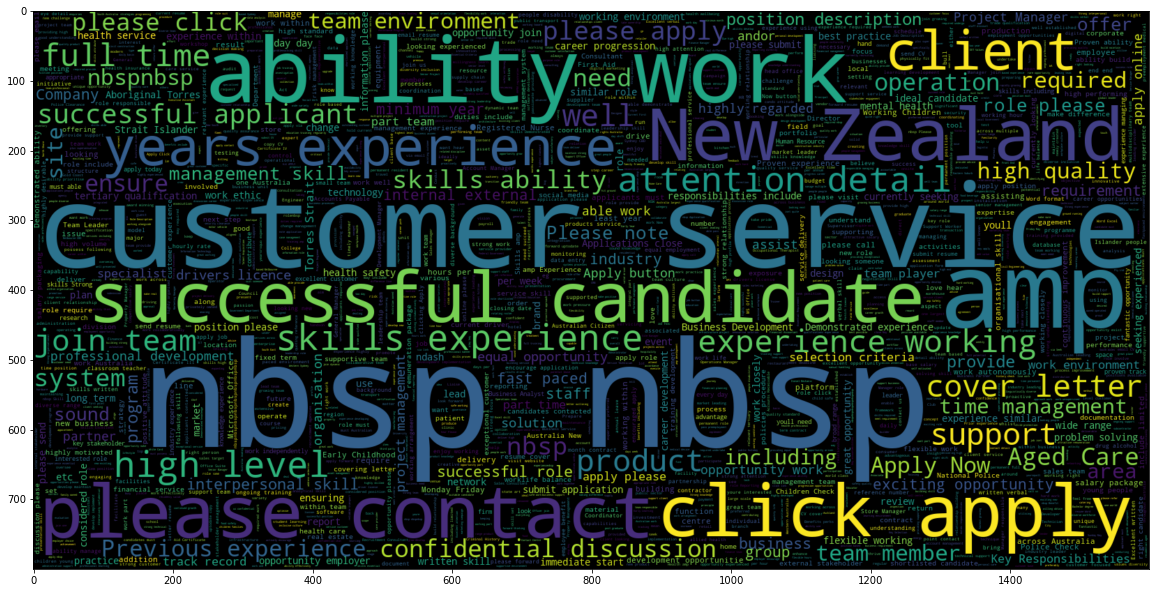

In [63]:
plt.figure(figsize = (20,20)) # Text that is not fraudulent(0)
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(m1[m1.Applied == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

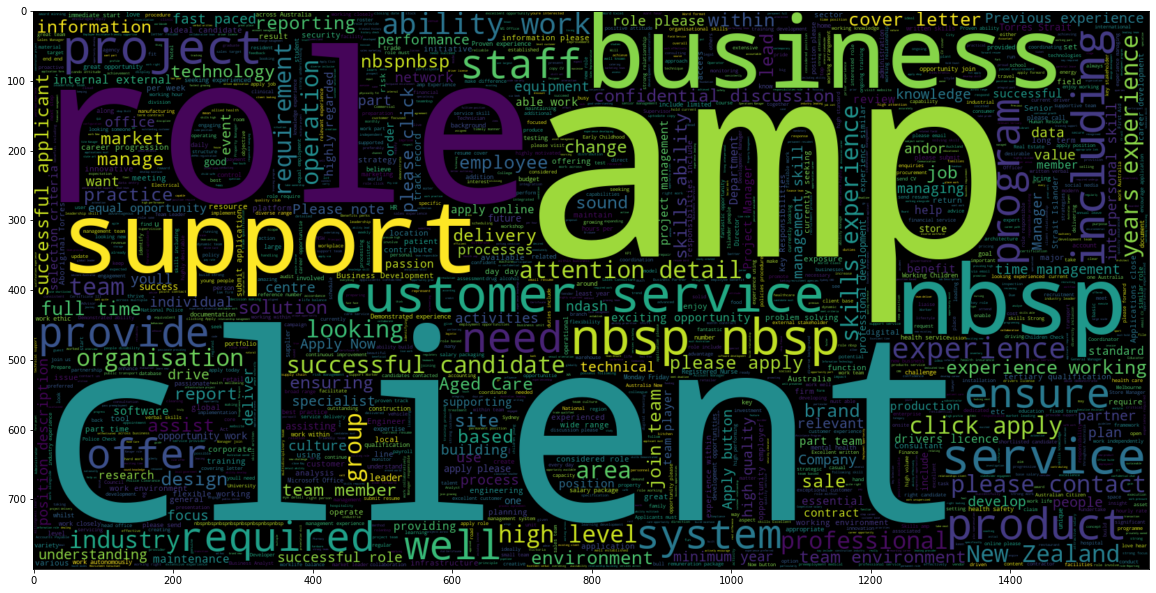

In [64]:
plt.figure(figsize = (20,20)) # Text that is not fraudulent(0)
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(m1[m1.Applied == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

<AxesSubplot:xlabel='Applied', ylabel='count'>

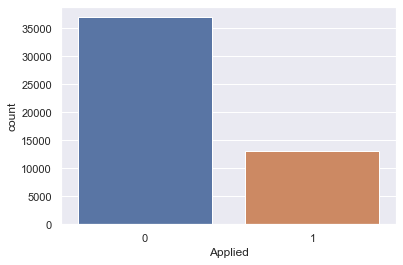

In [67]:


sns.set(style="darkgrid")
sns.countplot(x = "Applied" , data = m1)

In [80]:
train_text , test_text ,train_category , test_category = train_test_split(m1.text,m1.Applied , test_size = 0.2 , 
                                                                          random_state = 0)

                                                                          

In [93]:
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(train_text)
#transformed test reviews
cv_test_reviews=cv.transform(test_text)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (40000, 5359137)
BOW_cv_test: (10000, 5359137)


In [94]:
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(train_text)
#transformed test reviews
tv_test_reviews=tv.transform(test_text)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (40000, 5359137)
Tfidf_test: (10000, 5359137)


In [95]:
#training the model
mnb=MultinomialNB()
#fitting the nb for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_category)
print(mnb_bow)
#fitting the nb for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,train_category)
print(mnb_tfidf)

MultinomialNB()
MultinomialNB()


In [96]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)

In [99]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_category,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_category,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.6848
mnb_tfidf_score : 0.7218


In [100]:
mnb_bow_report = classification_report(test_category,mnb_bow_predict,target_names = ['0','1'])
print(mnb_bow_report)
mnb_tfidf_report = classification_report(test_category,mnb_tfidf_predict,target_names = ['0','1'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

           0       0.74      0.89      0.81      7357
           1       0.26      0.10      0.15      2643

    accuracy                           0.68     10000
   macro avg       0.50      0.50      0.48     10000
weighted avg       0.61      0.68      0.63     10000

              precision    recall  f1-score   support

           0       0.74      0.97      0.84      7357
           1       0.25      0.03      0.05      2643

    accuracy                           0.72     10000
   macro avg       0.49      0.50      0.44     10000
weighted avg       0.61      0.72      0.63     10000



In [101]:
cm_cv = confusion_matrix(test_category,mnb_bow_predict)
cm_tv = confusion_matrix(test_category,mnb_tfidf_predict)
cm_cv , cm_tv

(array([[6574,  783],
        [2369,  274]]),
 array([[7150,  207],
        [2575,   68]]))

In [102]:
cm_cv = pd.DataFrame(cm_cv, index=[0,1], columns=[0,1])
cm_cv.index.name = 'Actual'
cm_cv.columns.name = 'Predicted'
cm_tv = pd.DataFrame(cm_tv, index=[0,1], columns=[0,1])
cm_tv.index.name = 'Actual'
cm_tv.columns.name = 'Predicted'

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm_cv,cmap= "Blues",annot = True, fmt='')

## Let's use the Keras deeplearning

In [ ]:
model = Sequential()
model.add(Dense(units = 100 , activation = 'relu' , input_dim = cv_train_reviews.shape[1]))
model.add(Dense(units = 50 , activation = 'relu'))
model.add(Dense(units = 25 , activation = 'relu'))
model.add(Dense(units = 10 , activation = 'relu'))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()